# NLP Analysis of reviews
- Calculate sentiment and compare against the actual rating they user gave

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import os
import sys
sys.path.append(os.path.abspath("/Users/lucialarraona/Desktop/finalproject_socialgraphs22/Notebooks"))

from helper_functions import  *

import nltk 
from nltk.stem import PorterStemmer # para ver la raiz de las palabras(worker = work)
from nltk.tokenize import sent_tokenize, word_tokenize # para tokenizar las frases y las palabras 
import re # regex
import string

nltk.download('omw-1.4') #needed for lemmatizing

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer # an nltk package for sentiment analysis :D

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
from statistics import mean

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lucialarraona/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# With the reviews dataset, map the community for each user 
df_reviews = decompress_pickle('../Data/reviews_zipped.pbz2') 
print(df_reviews.shape)
df_reviews.head()

(1132367, 5)


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [3]:
df_com_map = pd.read_csv('user_community_map.csv')
print(df_com_map.shape)
df_com_map.head()

(15257, 2)


,user_id,community
0,1535,43.0
1,3288,52.0
2,4439,16.0
3,4470,16.0
4,4769,36.0


In [4]:
df_reviews_raw = pd.merge(df_com_map, df_reviews, how="left", on=["user_id"]) # merging left is using only the keys on the left df, in this case df_com_map
print(df_reviews_raw.shape)
df_reviews_raw.head()

(144295, 6)


,user_id,community,recipe_id,date,rating,review
0,1535,43.0,349022,2010-02-11,4,"After being w/o power all day, it came back on..."
1,1535,43.0,50022,2004-09-09,5,This is an excellent recipe. Even my not-a-big...
2,1535,43.0,78834,2005-02-02,5,Made these for my kids one day as a surprise a...
3,1535,43.0,47474,2004-08-04,5,Love them!! A quick & easy recipe with ingredi...
4,1535,43.0,230720,2007-07-02,5,I was a little afraid this might not work very...


In [5]:
# Make a copy to keep the raw dataframe for the future 
df_reviews2 = df_reviews_raw

In [72]:
# Sentiment analyzer .vader() without cleaning the sentences. .Vader() is prepared for analyzins short sentences like tweets. So It's better 
# split the long reviews in sentences. 

""""
def scores2(text):
    compound = [sid.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(text)]
    pos = [sid.polarity_scores(sentence)["pos"] for sentence in nltk.sent_tokenize(text)]
    neg = [sid.polarity_scores(sentence)["neg"] for sentence in nltk.sent_tokenize(text)]
    neu = [sid.polarity_scores(sentence)["neu"] for sentence in nltk.sent_tokenize(text)]
    final_compound = np.mean(compound)
    final_pos = np.mean(pos)
    final_neg = np.mean(neg)
    final_neu = np.mean(neu)
    return final_compound, final_pos, final_neg, final_neu

print(df_reviews2['review'][0])
scores2(df_reviews2['review'][0])

#df_reviews2['compound']= df_reviews2['review'].apply(lambda x : scores2(x))
#df_reviews2
""" 

After being w/o power all day, it came back on right before bedtime. I quickly threw all the fresh vegetables, raw chicken, broth and bouillon into the crock pot, so I could cook it overnight for the next day's lunch. The next morning, I added the tomatoes and beans and turned the crock pot down to "warm". Everything cooked up nice and tender. I really don't think you need to precook the chicken. It literally fell apart it was so tender. I skipped the butter and Tabasco sauce since I didn't need the fat, and I don't care for too much heat.


(0.050314285714285714,
 0.06371428571428571,
 0.019142857142857145,
 0.9171428571428571)

In [ ]:
def check_rating_vs_score():
    
    

    return None

## Clean text from reviews

In [6]:
def text_cleaning(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

stopwords = nltk.corpus.stopwords.words('english')

ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()

def clean_stem (review):

    temp1 ="".join(x for x in review if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3


def clean_lemma (review):
    
    temp1 ="".join(x for x in review if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3


df_reviews2['review'] =df_reviews2['review'] .astype('str')  # object to string
df_reviews2['review'] = df_reviews2['review'] .apply(text_cleaning) # cleaning 
df_reviews2['review_tokens']= df_reviews2['review'].map(clean_lemma) # apply lemmatization for now



In [7]:
df_reviews2.head()

,user_id,community,recipe_id,date,rating,review,review_tokens
0,1535,43.0,349022,2010-02-11,4,after being w o power all day it came back on...,"[w, power, day, came, back, right, bedtime, qu..."
1,1535,43.0,50022,2004-09-09,5,this is an excellent recipe even my not a big...,"[excellent, recipe, even, big, fan, banana, br..."
2,1535,43.0,78834,2005-02-02,5,made these for my kids one day as a surprise a...,"[made, kid, one, day, surprise, thought, reall..."
3,1535,43.0,47474,2004-08-04,5,love them a quick easy recipe with ingredi...,"[love, quick, easy, recipe, ingredient, always..."
4,1535,43.0,230720,2007-07-02,5,i was a little afraid this might not work very...,"[little, afraid, might, work, well, turned, lo..."


In [8]:
#//// Sanity check of differneces between lemmatizing and stemming
print(df_reviews2['review'][2])
print(clean_lemma(df_reviews2['review'][2]))
print()
print(df_reviews2['review'][2])
print(clean_stem(df_reviews2['review'][2]))

made these for my kids one day as a surprise and they thought they were really neat  being a perfectionist  i did have to make  legs but that s just me  an easy way to add some fun to lunch 
['made', 'kid', 'one', 'day', 'surprise', 'thought', 'really', 'neat', 'perfectionist', 'make', 'leg', 'easy', 'way', 'add', 'fun', 'lunch', '']

made these for my kids one day as a surprise and they thought they were really neat  being a perfectionist  i did have to make  legs but that s just me  an easy way to add some fun to lunch 
['made', 'kid', 'one', 'day', 'surpris', 'thought', 'realli', 'neat', 'perfectionist', 'make', 'leg', 'easi', 'way', 'add', 'fun', 'lunch', '']


In [9]:
sid = SentimentIntensityAnalyzer()


# Sentiment compound value of reviews
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']


#  Add Positive y Negative tag 
def cls(x):
    list1=[]
    for i in x["score"]:
        if i>0:
            list1.append("Positive")
        elif i==0:
            list1.append("Neutral")
        else:
            list1.append("Negative")
    x["sentiment"]=list1



df_reviews2['score']= df_reviews2['review'].apply(lambda x : sentiment(x)) #score
cls(df_reviews2) # tag (for plotting)
df_reviews2.head() 


,user_id,community,recipe_id,date,rating,review,review_tokens,score,sentiment
0,1535,43.0,349022,2010-02-11,4,after being w o power all day it came back on...,"[w, power, day, came, back, right, bedtime, qu...",0.8481,Positive
1,1535,43.0,50022,2004-09-09,5,this is an excellent recipe even my not a big...,"[excellent, recipe, even, big, fan, banana, br...",0.9707,Positive
2,1535,43.0,78834,2005-02-02,5,made these for my kids one day as a surprise a...,"[made, kid, one, day, surprise, thought, reall...",0.9166,Positive
3,1535,43.0,47474,2004-08-04,5,love them a quick easy recipe with ingredi...,"[love, quick, easy, recipe, ingredient, always...",0.6486,Positive
4,1535,43.0,230720,2007-07-02,5,i was a little afraid this might not work very...,"[little, afraid, might, work, well, turned, lo...",0.9722,Positive


In [10]:
import plotly as ply
import plotly.graph_objs as go

Mno=df_reviews2[df_reviews2.sentiment=="Positive"]["score"].count()
Fno=df_reviews2[df_reviews2.sentiment=="Negative"]["score"].count()
Nno=df_reviews2[df_reviews2.sentiment=="Neutral"]["score"].count()
labels = ["Positive Comments","Negative Comments","Neutral Comments"]
values = [Mno,Fno,Nno]
fig = go.Figure(data=[go.Pie(labels=labels, values=values,hole=0.4)])
fig.show()

In [11]:
# Rescaling the score to 0-1 and then divinding by 5 to match the range of the rating and comapre

from sklearn.preprocessing import minmax_scale

df_reviews2[['score_scale']] = minmax_scale(df_reviews2[['score']])
df_reviews2[['score_scale2']] = df_reviews2[['score_scale']]*5
df_reviews2

,user_id,community,recipe_id,date,rating,review,review_tokens,score,sentiment,score_scale,score_scale2
0,1535,43.0,349022,2010-02-11,4,after being w o power all day it came back on...,"[w, power, day, came, back, right, bedtime, qu...",0.8481,Positive,0.923671,4.618357
1,1535,43.0,50022,2004-09-09,5,this is an excellent recipe even my not a big...,"[excellent, recipe, even, big, fan, banana, br...",0.9707,Positive,0.985603,4.928016
2,1535,43.0,78834,2005-02-02,5,made these for my kids one day as a surprise a...,"[made, kid, one, day, surprise, thought, reall...",0.9166,Positive,0.958274,4.791372
3,1535,43.0,47474,2004-08-04,5,love them a quick easy recipe with ingredi...,"[love, quick, easy, recipe, ingredient, always...",0.6486,Positive,0.822894,4.114468
4,1535,43.0,230720,2007-07-02,5,i was a little afraid this might not work very...,"[little, afraid, might, work, well, turned, lo...",0.9722,Positive,0.986361,4.931804
...,...,...,...,...,...,...,...,...,...,...,...
144290,2002371420,41.0,50245,2018-12-18,5,made this with a slight variation added the p...,"[made, slight, variation, added, parmesan, che...",0.0000,Neutral,0.495252,2.476258
144291,2002371445,5.0,2886,2018-12-19,5,i ve been using this recipe for years and its...,"[using, recipe, year, one, use, tried, several...",0.1779,Positive,0.585118,2.925591
144292,2002371627,50.0,153647,2018-12-19,0,best thing about this recipe i didn t have to...,"[best, thing, recipe, scroll, past, rambling, ...",0.9572,Positive,0.978784,4.893918
144293,2002371843,60.0,516662,2018-12-19,5,this cake is incredible tasting and easy to ma...,"[cake, incredible, tasting, easy, make, froste...",0.8519,Positive,0.925591,4.627955


In [12]:
# Mean, 10th and 90th percentile of the sentiment

mean_rev= df_reviews2['score_scale2'].describe()['mean']

print(f'The mean of the sentiment in the reviews: {mean_rev}')
print("90th percentile of the sentiment: ",
       np.percentile(df_reviews2['score_scale2'], 90))

print("10th percentile of the sentiment: ",
       np.percentile(df_reviews2['score_scale2'], 10))


# Add the percentiles to a list for the plotting
percentiles = [np.percentile(df_reviews2['score_scale2'], 90), np.percentile(df_reviews2['score_scale2'], 10)]

The mean of the sentiment in the reviews: 4.452607672096389
90th percentile of the sentiment:  4.939634269549405
10th percentile of the sentiment:  3.588603758335018


In [13]:
list_sentiment = list(zip(df_reviews2['user_id'], df_reviews2['score_scale2']))

In [22]:
def plot_pretty_hist(list_data, percentiles, mean, plot_perct = False, title = str, color=str):

    x = [val for (node, val) in list_data]
    fig,ax = plt.subplots(figsize = (10,6))
    cnts, values, bars = ax.hist(x, edgecolor='black', 
                                        bins=10,
                                        color=color,
                                        alpha = 0.2)

    if plot_perct == True:
        # Plot mean
        ax.axvline(mean, color='black', linestyle = '-', linewidth=4) 
        # Plot percentiles and mean lines
        quants = [[percentiles[0], 0.8, 0.90], [percentiles[1], 0.8, 0.40]]
        for i in quants:
            ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color = 'Red' ,linewidth=3)  

        
        # Labels and titles
        ax.set_ylabel("Review Count")
        ax.set_xlabel("Average Sentiment")
        ax.set_title(f"{title}")
        ax.legend(['Mean','90th percentile','10th percentile'])
        caption = ("Figure: Histogram of the mean average of reviews for the user interactions dataset.\n"
                    "Black line represents the mean across pages and the red dotted lines the 10th and 90th percentile respectively.")
        fig.text(0.02,-0.1, caption, ha='left')
        
        # Remove ticks and spines
        for ax, spine in ax.spines.items():
            spine.set_visible(True)
        plt.show()
        
        

    else:
        
        # Plot the mean
        ax.axvline(mean, color='black', linewidth=4) 
        
        # Labels and titles
        ax.set_ylabel("Page Count")
        ax.set_xlabel("Average Sentiment")
        ax.set_title(f"{title}")
        ax.legend(['Mean'])
        caption = ('haha')
        fig.text(0.02,-0.1, caption, ha='left')
        
        # Remove ticks and spines
        for ax, spine in ax.spines.items():
            spine.set_visible(True)
        plt.show()

    return None

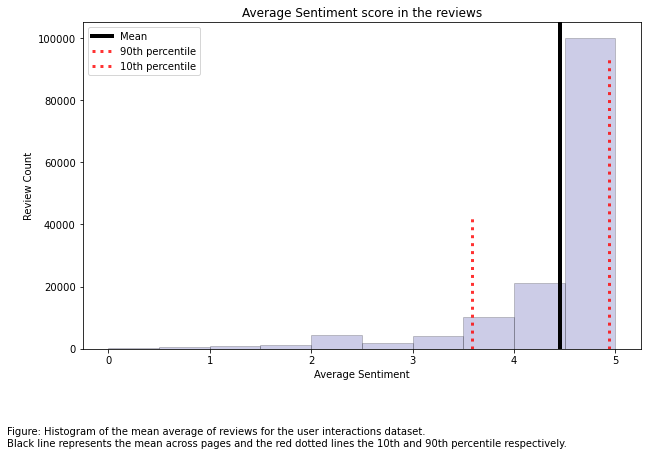

In [29]:
plot_pretty_hist(list_sentiment,percentiles, mean_rev, plot_perct= True, 
                 title="Average Sentiment score in the reviews",
                 color = 'darkblue')

> **Label permutation test to investigate the two hypotheses below**
>* **H1: Good reviews (>4 rating) have a higher averge value for sentiment than a similarly sized set of randomly rated reviews.**
>* **H2: Bad reviews (<4) have a lower average value for sentiment than a similarly sized set of randomly rated reviews.**
>* **Write a short paragraph reflecting on your findings.**

In [49]:
# We will relabel de dataset for easier permutation test analysis:
threshold = 3.5
df_reviews2['good'] = df_reviews2['score_scale2'].map(lambda x: 1 if x > threshold else 0)
df_reviews2['bad'] = df_reviews2['score_scale2'].map(lambda x: 1 if x < threshold else 0 )
df_reviews2.head()

,user_id,community,recipe_id,date,rating,review,review_tokens,score,sentiment,score_scale,score_scale2,true_labels,good,bad,good_shuffled,bad_shuffled
0,1535,43.0,349022,2010-02-11,4,after being w o power all day it came back on...,"[w, power, day, came, back, right, bedtime, qu...",0.8481,Positive,0.923671,4.618357,1,1,0,1,0
1,1535,43.0,50022,2004-09-09,5,this is an excellent recipe even my not a big...,"[excellent, recipe, even, big, fan, banana, br...",0.9707,Positive,0.985603,4.928016,1,1,0,1,0
2,1535,43.0,78834,2005-02-02,5,made these for my kids one day as a surprise a...,"[made, kid, one, day, surprise, thought, reall...",0.9166,Positive,0.958274,4.791372,1,1,0,1,0
3,1535,43.0,47474,2004-08-04,5,love them a quick easy recipe with ingredi...,"[love, quick, easy, recipe, ingredient, always...",0.6486,Positive,0.822894,4.114468,1,1,0,1,0
4,1535,43.0,230720,2007-07-02,5,i was a little afraid this might not work very...,"[little, afraid, might, work, well, turned, lo...",0.9722,Positive,0.986361,4.931804,1,1,0,1,1


In [41]:
# Shuffle the good/bad attribute

avg_score_shuffle_good = []
avg_score_shuffle_bad = []
avg_score_good = []
avg_score_bad = []


for _ in range(1000):
    
    # Create a list of shuffled good attribute and append it to the df_reviews2
    df_reviews2['good_shuffled'] = np.random.permutation(df_reviews2['good'])
    df_reviews2['bad_shuffled'] = np.random.permutation(df_reviews2['bad'])
    
    # Create a new df for every iteration on the loop 
    df_test = pd.DataFrame() 
    df_test['user_id'] = df_reviews2['user_id']       #character
    df_test['good_true'] = df_reviews2['good']              #true labels
    df_test['bad_true'] = df_reviews2['bad'] # true labels
    df_test['good_shuffled'] = df_reviews2['good_shuffled'] #shuffled labels
    df_test['bad_shuffled'] = df_reviews2['bad_shuffled']  #shuffled labels
    df_test['score_scale2'] = df_reviews2['score_scale2']


    # group with just characters and shuffled labels (random group)
    shuffled_group_good = df_test[df_test['good_shuffled']== 1] # good characters
    avg_score_shuffle_good.append(np.mean(shuffled_group_good['score_scale2'])) 
    
    # group with just characters and shuffled labels (random group)
    shuffled_group_bad = df_test[df_test['bad_shuffled']== 1] # bad characters
    avg_score_shuffle_bad.append(np.mean(shuffled_group_bad['score_scale2']))

# group with just characters and their true labels 
true_group_good = df_reviews2[df_reviews2['good'] == 1]
avg_score_good = np.mean(true_group_good['score_scale2']) #it will always be the same number because of the true labels

# group with just characters and their true labels 
true_group_bad = df_reviews2[df_reviews2['bad'] == 1]
avg_score_bad = np.mean(true_group_bad['score_scale2']) #it will always be the same number because of the true labels

In [47]:
def plot_pretty_hist_pair(shuffled_group_good, true_group_good, shuffled_group_bad, true_group_bad):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,6))


    # H1
    list_shuffle_good = list(zip(shuffled_group_good['user_id'], shuffled_group_good['score_scale2']))
    x_good = [val for (node, val) in list_shuffle_good]
    
    cnts, values, bars = ax1.hist(x_good, edgecolor='black', 
                                     bins=20,
                                     color='green',
                                     alpha = 0.2)

    # Mean of shuffled labels
    ax1.axvline(mean(avg_score_shuffle_good), color='green', linewidth=2)
    # Mean of true labels
    ax1.axvline(avg_score_good, color='black', linewidth=2)

    # Labels and titles
    ax1.set_ylabel("Page Count")
    ax1.set_xlabel("Average Sentiment")
    ax1.set_title("Sentiment score in Good Reviews: True vs shuffled labels")
    ax1.legend(['Mean Shuffled Good Reviews','Mean True Good Reviews'])


    
    
    # ----------------------------
    
    # H2
    list_shuffle = list(zip(shuffled_group_bad['user_id'], shuffled_group_bad['score_scale2']))
    x = [val for (node, val) in list_shuffle]
    cnts, values, bars = ax2.hist(x, edgecolor='black', 
                                     bins=20,
                                     color='red',
                                     alpha = 0.2)
    # Mean of shuffled labels
    ax2.axvline(mean(avg_score_shuffle_bad), color='red', linewidth=2) 
    # Mean of true labels
    ax2.axvline(avg_score_bad, color='black', linewidth=2) 
    

    # Labels and titles
    ax2.set_ylabel("Page Count")
    ax2.set_xlabel("Average Sentiment")
    ax2.set_title("Sentiment score in Bad Reviews: True vs shuffled labels")
    ax2.legend(['Mean Shuffled Bad Reviews','Mean True Bad Reviews'])


    plt.show()

    pass

    return None

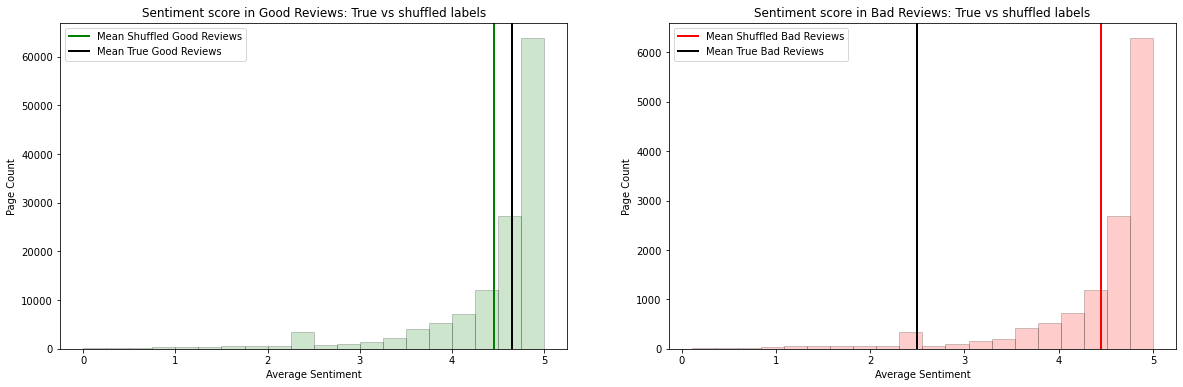

In [48]:
plot_pretty_hist_pair(shuffled_group_good, true_group_good, shuffled_group_bad, true_group_bad)

> In conclusion, the average sentiment for the good reviews is lower than a random group of reviews with shuffled labels, determining which is expected as the number of good reviews and good words is higher in our dataset

> The true average sentiment for the bad reviews is way lower than a random group of shuffled labels, also because of lower representation of the bad reviews. 

Both hypothesis are correct for the (unbalanced) good and bad reviews groups.

In [50]:
df_reviews2['true_labels'].value_counts()

1    131285
0     13010
Name: true_labels, dtype: int64

In [87]:
df_slice1= df_reviews2[df_reviews2['true_labels'] == 1].head(13010)
df_slice2 = df_reviews2[df_reviews2['true_labels'] == 0]
new_df = pd.concat([df_slice1,df_slice2])
print(new_df['true_labels'].value_counts())
new_df.head()

1    13010
0    13010
Name: true_labels, dtype: int64


,user_id,community,recipe_id,date,rating,review,review_tokens,score,sentiment,score_scale,score_scale2,true_labels,good,bad,good_shuffled,bad_shuffled
0,1535,43.0,349022,2010-02-11,4,after being w o power all day it came back on...,"[w, power, day, came, back, right, bedtime, qu...",0.8481,Positive,0.923671,4.618357,1,1,0,1,0
1,1535,43.0,50022,2004-09-09,5,this is an excellent recipe even my not a big...,"[excellent, recipe, even, big, fan, banana, br...",0.9707,Positive,0.985603,4.928016,1,1,0,1,0
2,1535,43.0,78834,2005-02-02,5,made these for my kids one day as a surprise a...,"[made, kid, one, day, surprise, thought, reall...",0.9166,Positive,0.958274,4.791372,1,1,0,1,0
3,1535,43.0,47474,2004-08-04,5,love them a quick easy recipe with ingredi...,"[love, quick, easy, recipe, ingredient, always...",0.6486,Positive,0.822894,4.114468,1,1,0,1,0
4,1535,43.0,230720,2007-07-02,5,i was a little afraid this might not work very...,"[little, afraid, might, work, well, turned, lo...",0.9722,Positive,0.986361,4.931804,1,1,0,1,0


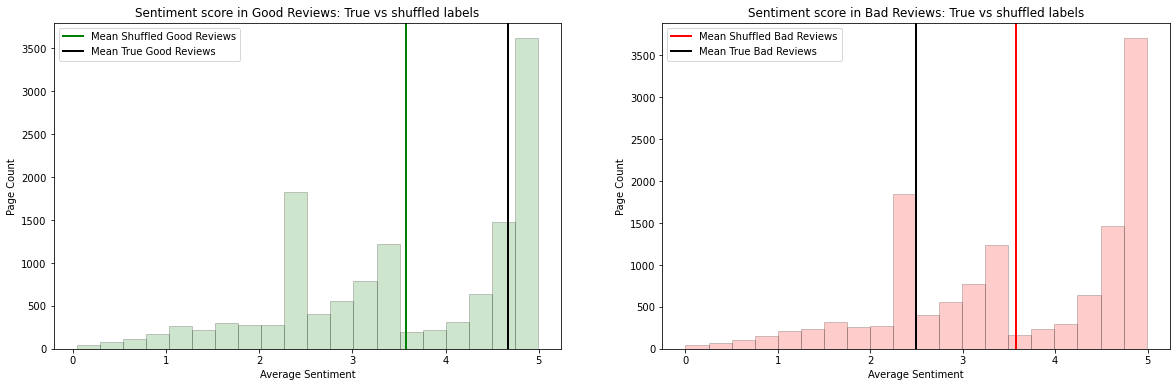

In [88]:
# Shuffle the good/bad attribute

avg_score_shuffle_good = []
avg_score_shuffle_bad = []
avg_score_good = []
avg_score_bad = []


for _ in range(1000):
    
    # Create a list of shuffled good attribute and append it to the new_df
    new_df['good_shuffled'] = np.random.permutation(new_df['good'])
    new_df['bad_shuffled'] = np.random.permutation(new_df['bad'])
    
    # Create a new df for every iteration on the loop 
    df_test = pd.DataFrame() 
    df_test['user_id'] = new_df['user_id']       #character
    df_test['good_true'] = new_df['good']              #true labels
    df_test['bad_true'] = new_df['bad'] # true labels
    df_test['good_shuffled'] = new_df['good_shuffled'] #shuffled labels
    df_test['bad_shuffled'] = new_df['bad_shuffled']  #shuffled labels
    df_test['score_scale2'] = new_df['score_scale2']


    # group with just characters and shuffled labels (random group)
    shuffled_group_good = df_test[df_test['good_shuffled']== 1] # good characters
    avg_score_shuffle_good.append(np.mean(shuffled_group_good['score_scale2'])) 
    
    # group with just characters and shuffled labels (random group)
    shuffled_group_bad = df_test[df_test['bad_shuffled']== 1] # bad characters
    avg_score_shuffle_bad.append(np.mean(shuffled_group_bad['score_scale2']))

# group with just characters and their true labels 
true_group_good = new_df[new_df['good'] == 1]
avg_score_good = np.mean(true_group_good['score_scale2']) #it will always be the same number because of the true labels

# group with just characters and their true labels 
true_group_bad = new_df[new_df['bad'] == 1]
avg_score_bad = np.mean(true_group_bad['score_scale2']) #it will always be the same number because of the true labels


plot_pretty_hist_pair(shuffled_group_good, true_group_good, shuffled_group_bad, true_group_bad)

# Visualization of positive and negative words in reviews
- Wordclouds of the positive and negative words found in the already grouped positive and negative reviews
- Also group by community afterwards

In [89]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

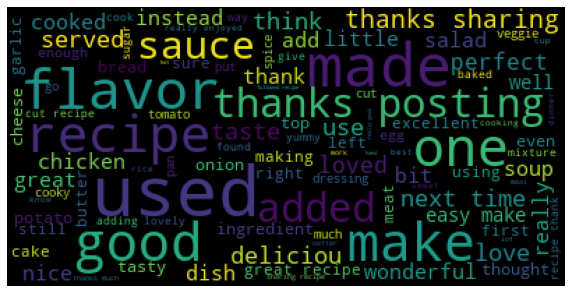

In [91]:
# Good reviews 

df_good = new_df[new_df['true_labels'] == 1]
list_words  = list(df_good["review_tokens"])
flat_list = [item for sublist in list_words for item in sublist]
wc(flat_list,'black','Common Words' )

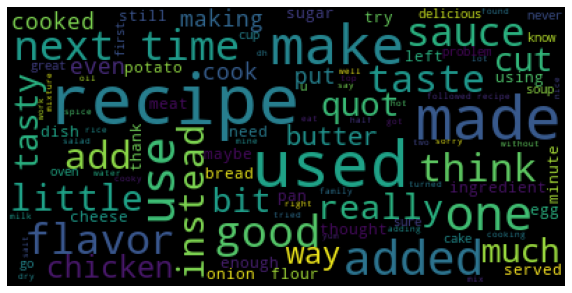

In [92]:
df_bad= new_df[new_df['true_labels'] == 0]
list_words  = list(df_bad["review_tokens"])
flat_list = [item for sublist in list_words for item in sublist]
wc(flat_list,'black','Common Words' )

# Community analysis of Actual Rating vs Calculated Score
* a) Rating vs Sentiment score by community
* b) Rating vs Sentiment score by recipe in each community
    - How many recipes in each community have the same score?
* c) Rating vs Sentiment score by user in each community
    - How many recipes have each user rated?

### a) **Average Rating vs Sentiment score by community**

In [31]:
df_mean_rating= pd.DataFrame(df_reviews2.groupby(by=["community"])['rating','score_scale2'].mean())
df_mean_rating

,rating,score_scale2
community,,
0.0,3.393665,4.041604
1.0,4.239961,4.363396
2.0,4.308029,4.281282
3.0,4.044586,4.195960
4.0,3.181818,4.436181
...,...,...
65.0,4.400000,4.024382
66.0,2.142857,3.227961
67.0,4.516129,4.402409


In [32]:
df_mean_rating = df_mean_rating.reset_index()

The mean of the sentiment in the reviews: 4.199637469675379
90th percentile of the sentiment:  4.491394104499854
10th percentile of the sentiment:  3.8474681906966213


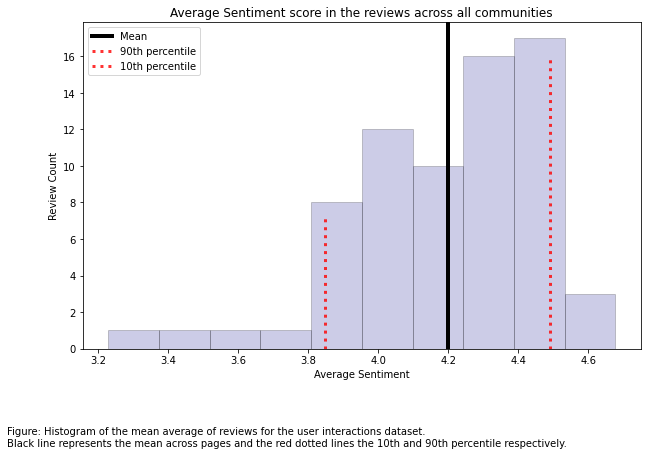

In [36]:
# Mean, 10th and 90th percentile of the sentiment

mean_rev= df_mean_rating['score_scale2'].describe()['mean']

print(f'The mean of the sentiment in the reviews across all communities: {mean_rev}')
print("90th percentile of the sentiment: ",
       np.percentile(df_mean_rating['score_scale2'], 90))

print("10th percentile of the sentiment: ",
       np.percentile(df_mean_rating['score_scale2'], 10))


# Add the percentiles to a list for the plotting
percentiles = [np.percentile(df_mean_rating['score_scale2'], 90), np.percentile(df_mean_rating['score_scale2'], 10)]


list_sentiment = list(zip(df_mean_rating['community'], df_mean_rating['score_scale2']))

plot_pretty_hist(list_sentiment,percentiles, mean_rev, plot_perct= True, 
                 title="Average Sentiment score in the reviews across all communities",
                 color = 'darkblue')

In [34]:
fig = px.bar(
    data_frame = df_mean_rating,
    x = "community",
    y = ["rating","score_scale2"],
    opacity = 0.9,
    orientation = "v",
    barmode = 'group',
    color_discrete_map={'rating':'green', 'score_scale2':'orange'},
    title='Average Rating vs Average Calculated Sentiment Score (per community)',
)

fig.update_layout(

  xaxis_title= 'Community',
yaxis_title = 'Score vs Rating',

)


> **Label permutation test to investigate the two hypotheses below**
>* **H1: Good reviews (>4 rating) have a higher averge value for sentiment than a similarly sized set of randomly selected reviews.**
>* **H2: Bad reviews (<4) have a lower average value for sentiment than a similarly sized set of randomly selected reviews.**
>* **Write a short paragraph reflecting on your findings.**

In [ ]:
# First let's relabel the rating to create two groups (above 4 and below 4 rating)



### b) **Average Rating vs Sentiment score per recipe by community**

In [92]:
df_mean_rating_recipe= pd.DataFrame(df_reviews2.groupby(by=["community",'recipe_id'])['rating','score_scale2'].mean())
df_mean_rating_recipe


rating  score_scale2
community recipe_id                      
0         2496         5.00      4.917660
          2886         5.00      4.769398
          4417         0.00      4.857800
          4892         5.00      4.931552
          7343         5.00      3.920742
...                     ...           ...
69        76043        3.00      4.763336
          138708       2.00      3.845979
          175091       3.75      3.380670
          293133       5.00      4.897707
          412064       5.00      4.712063

[107098 rows x 2 columns]

In [93]:
# Select community 0
com0 = df_mean_rating_recipe.loc[0, :]
com0
com0 = com0.reset_index()
com0['recipe_id'] = com0['recipe_id'].astype(str)
com0

,recipe_id,rating,score_scale2
0,2496,5.000000,4.917660
1,2886,5.000000,4.769398
2,4417,0.000000,4.857800
3,4892,5.000000,4.931552
4,7343,5.000000,3.920742
...,...,...,...
265,508459,5.000000,4.873964
266,512762,4.000000,4.312235
267,527547,4.000000,4.937361
268,531223,4.000000,3.806577


In [94]:
fig = px.bar(
    data_frame = com0,
    x = "recipe_id",
    y = ["rating","score_scale2"],
    opacity = 0.9,
    orientation = "v",
    barmode = 'group',
    color_discrete_map={'rating':'green', 'score_scale2':'orange'},
    title='Average Rating vs Calculated Sentiment score (per recipe) in Community 0',
   # hover_name= 'recipe_id',
)

fig.update_layout(

  xaxis_title= 'Recipes in Community 0',
  yaxis_title = 'Score vs Rating',
  hovermode = 'x unified'

)

### c) **Average Rating vs Sentiment score per user by community**

In [107]:
# How many recipes have each user reviewed in each community???? 
df_count= pd.DataFrame(df_reviews2.groupby(by=["community",'user_id'])['recipe_id'].count())
df_count


recipe_id
community user_id              
0         57993               9
          63878               1
          310313              7
          315479             20
          325879              2
...                         ...
68        2002302691          1
69        1803099400          9
          2001597635          1
          2001640468          1
          2002274344          1

[15257 rows x 1 columns]

In [108]:
df_count = df_count.loc[1, :]
df_count = df_count.reset_index()
df_count['user_id'] = df_count['user_id'].astype(str)

fig = px.bar(
    data_frame = df_count,
    x = "user_id",
    y = ["recipe_id"],
    opacity = 0.9,
    orientation = "v",
    #barmode = 'group',
    #color_discrete_map={'rating':'green', 'score_scale2':'orange'},
    title='Nº of reviewd recipes per user in commnunity 0 ',
   # hover_name= 'recipe_id',
)

fig.update_layout(

  xaxis_title= 'Users in Community 0',
  yaxis_title = 'Recipe count',
  hovermode = 'x unified'

)


In [109]:
df_mean_rating_recipe_user= pd.DataFrame(df_reviews2.groupby(by=["community",'user_id'])['rating','score_scale2'].mean())
df_mean_rating_recipe_user

rating  score_scale2
community user_id                           
0         57993       4.777778      4.353629
          63878       5.000000      4.772681
          310313      4.857143      4.692218
          315479      4.650000      4.403541
          325879      5.000000      4.600677
...                        ...           ...
68        2002302691  5.000000      4.762831
69        1803099400  4.333333      4.666712
          2001597635  5.000000      4.268539
          2001640468  3.000000      2.476258
          2002274344  2.000000      2.476258

[15257 rows x 2 columns]

In [110]:
# Select community
com0_a = df_mean_rating_recipe_user.loc[0, :]
com0_a = com0_a.reset_index()
com0_a['user_id'] = com0_a['user_id'].astype(str)
com0_a

,user_id,rating,score_scale2
0,57993,4.777778,4.353629
1,63878,5.000000,4.772681
2,310313,4.857143,4.692218
3,315479,4.650000,4.403541
4,325879,5.000000,4.600677
...,...,...,...
217,2002286265,4.000000,4.593100
218,2002298217,5.000000,4.598404
219,2002308604,5.000000,3.635078
220,2002319310,0.000000,4.836583


In [104]:
fig = px.bar(
    data_frame = com0_a,
    x = "user_id",
    y = ["rating","score_scale2"],
    opacity = 0.9,
    orientation = "v",
    barmode = 'group',
    color_discrete_map={'rating':'green', 'score_scale2':'orange'},
    title='Average Rating vs Calculated Sentiment score (per user) in Community 0',
   # hover_name= 'recipe_id',
)

fig.update_layout(

  xaxis_title= 'Users in Community 0',
  yaxis_title = 'Score  vs Rating',
  hovermode = 'x unified'

)